## CORE NYF perturbation wind analysis off of Maude Rise

In [22]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage




Populating the interactive namespace from numpy and matplotlib


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.01/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['square', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
#extract the model grid info
u_file ='/g/data1/v45/pas561/mom/input/u_10.ncra.nc'
v_file ='/g/data1/v45/pas561/mom/input/v_10.ncra.nc'

# Extract the variables
nc = Dataset(u_file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
nyf_u_10 = nc.variables['U_10_MOD'][:]
nc.close() # close the file

# Extract the variables
nc = Dataset(v_file, mode='r') # file handle, open in read only mode
nyf_v_10 = nc.variables['V_10_MOD'][:]
nc.close() # close the file


#fh=fcor/ht
print lat.shape
print lon.shape
print nyf_u_10.shape
print nyf_v_10.shape


(94,)
(192,)
(1, 94, 192)
(1, 94, 192)


In [24]:
u_file ='/g/data1/v45/pas561/mom/input/wedpolywinds/u_10.30Sup15shift4.indo.v4.ncra.nc'
v_file ='/g/data1/v45/pas561/mom/input/wedpolywinds/v_10.30Sup15shift4.indo.v4.ncra.nc'

# Extract the variables
nc = Dataset(u_file, mode='r') # file handle, open in read only mode
#latitude = nc.variables['LAT'][:]
#longitude = nc.variables['LON'][:]
pert_u_10 = nc.variables['U_10_MOD'][:]
nc.close() # close the file

# Extract the variables
nc = Dataset(v_file, mode='r') # file handle, open in read only mode
pert_v_10 = nc.variables['V_10_MOD'][:]
nc.close() # close the file

print pert_u_10.shape

(1, 94, 192)


In [25]:
#omega= 7.2921 × 10−5 rad/s
print lat.shape 
jm=lat.shape[0]
im=lon.shape[0]
print im, jm
fcor=np.zeros((jm,im))
print fcor.shape
for j in range(jm):
    fcor[j,:]=2*7.291E-5*np.sin(lat[j]*pi/180)

print fcor[:,100]

(94,)
192 94
(94, 192)
[ -1.45772790e-04  -1.45571299e-04  -1.45209019e-04  -1.44686313e-04
  -1.44003713e-04  -1.43161960e-04  -1.42161972e-04  -1.41004979e-04
  -1.39692111e-04  -1.38224844e-04  -1.36604868e-04  -1.34833884e-04
  -1.32913916e-04  -1.30847090e-04  -1.28635697e-04  -1.26282043e-04
  -1.23788984e-04  -1.21159005e-04  -1.18395143e-04  -1.15500459e-04
  -1.12478140e-04  -1.09331530e-04  -1.06064108e-04  -1.02679489e-04
  -9.91814018e-05  -9.55737174e-05  -9.18604300e-05  -8.80454269e-05
  -8.41333282e-05  -8.01282690e-05  -7.60346588e-05  -7.18570292e-05
  -6.75997771e-05  -6.32680415e-05  -5.88663982e-05  -5.43994681e-05
  -4.98726611e-05  -4.52907396e-05  -4.06585334e-05  -3.59816342e-05
  -3.12649794e-05  -2.65135234e-05  -2.17330186e-05  -1.69285008e-05
  -1.21050204e-05  -7.26841813e-06  -2.42378370e-06   2.42378370e-06
   7.26841813e-06   1.21050204e-05   1.69285008e-05   2.17330186e-05
   2.65135234e-05   3.12649794e-05   3.59816342e-05   4.06585334e-05
   4.529073

In [26]:
jm=lat.shape[0]
im=lon.shape[0]
print 'jm,im',jm,im
print 'shape area_t=\n ',jm, im

geolon=np.zeros((jm,im))
geolat=np.zeros((jm,im))

for j in range(jm):
    geolon[j,:]=lon[:]

for i in range(im):
    geolat[:,i]=lat[:]

print geolat.shape
print geolon.shape

print geolat
#print geolon

jm,im 94 192
shape area_t=
  94 192
(94, 192)
(94, 192)
[[-88.54199982 -88.54199982 -88.54199982 ..., -88.54199982 -88.54199982
  -88.54199982]
 [-86.65319824 -86.65319824 -86.65319824 ..., -86.65319824 -86.65319824
  -86.65319824]
 [-84.75319672 -84.75319672 -84.75319672 ..., -84.75319672 -84.75319672
  -84.75319672]
 ..., 
 [ 84.75319672  84.75319672  84.75319672 ...,  84.75319672  84.75319672
   84.75319672]
 [ 86.65319824  86.65319824  86.65319824 ...,  86.65319824  86.65319824
   86.65319824]
 [ 88.54199982  88.54199982  88.54199982 ...,  88.54199982  88.54199982
   88.54199982]]


In [27]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.10.0


In [28]:
NYFCntrlDir ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(NYFCntrlDir, mode='r') # file handle, open in read only mode
area_t = nc.variables['area_t'][:]
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
nc.close() # close the file
print 'area_t[100,100]',area_t[100,100],np.sum(area_t)

#print geolon_t
#print geolat_t


area_t[100,100] 1.08867e+08 5.07057e+14


In [29]:
jm=lat.shape[0]
im=lon.shape[0]
print 'jm,im',jm,im
print 'shape area_t=\n ',jm, im

r=6378000
dxt=np.zeros((jm,im))
dyt=np.zeros((jm,im))
a=np.zeros((jm,im))
print 'shape a=\n ',a.shape

for j in range(jm):
    #print 'j', j
    for i in range(im-1):
        dlon=np.abs(lon[i+1]-lon[i])
        dxt[j,i]= r*np.cos(lat[j]*np.pi/180)*dlon*np.pi/180

    dxt[j,im-1]=dxt[j,im-2]

for i in range(im):
    for j in range(jm-1):
        dlat=np.abs(lat[j+1]-lat[j])
        dyt[j,i]= r*dlat*np.pi/180

    dyt[jm-1,i]=dyt[jm-2,i]

for j in range(jm):
    for i in range(im):
        a[j,i]=dxt[j,i]*dyt[j,i]

print 'a[50,100] sum',a[50,100],np.sum(a)


jm,im 94 192
shape area_t=
  94 192
shape a=
  (94, 192)
a[50,100] sum 43954668306.6 5.11187762023e+14


In [30]:
CntrlDir = '/g/data1/v45/pas561/mom/input/'

of=os.path.join(CntrlDir,'nyf_area.npy')
np.save(of,a)
of=os.path.join(CntrlDir,'nyf_dxt.npy')
np.save(of,dxt)
of=os.path.join(CntrlDir,'nyf_dyt.npy')
np.save(of,dyt)

of=os.path.join(CntrlDir,'nyf_area.npy')
a2=np.load(of)
of=os.path.join(CntrlDir,'nyf_dxt.npy')
dxt2=np.load(of)
of=os.path.join(CntrlDir,'nyf_dyt.npy')
dyt2=np.load(of)
print a2.shape,dxt2.shape,np.sum(a2)




(94, 192) (94, 192) 5.11187762023e+14


[-10.    -9.75  -9.5   -9.25  -9.    -8.75  -8.5   -8.25  -8.    -7.75
  -7.5   -7.25  -7.    -6.75  -6.5   -6.25  -6.    -5.75  -5.5   -5.25  -5.
  -4.75  -4.5   -4.25  -4.    -3.75  -3.5   -3.25  -3.    -2.75  -2.5
  -2.25  -2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25   0.     0.25
   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25   2.5    2.75   3.
   3.25   3.5    3.75   4.     4.25   4.5    4.75   5.     5.25   5.5
   5.75   6.     6.25   6.5    6.75   7.     7.25   7.5    7.75   8.     8.25
   8.5    8.75   9.     9.25   9.5    9.75  10.  ]


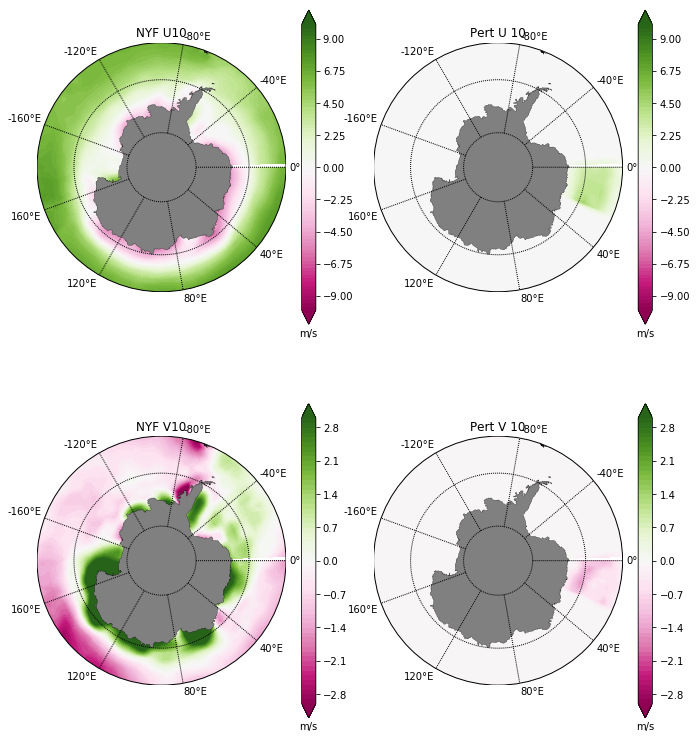

In [36]:
#plot wind speed
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-10,10.25,.25)
print clev

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,nyf_u_10[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('NYF U10')


plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,pert_u_10[0]-nyf_u_10[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Pert U 10')


clev = np.arange(-3,3.1,.1)

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,nyf_v_10[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('NYF V10')


plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,pert_v_10[0]-nyf_v_10[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Pert V 10')

plt.tight_layout()

In [34]:
#convert speeds to stress
rho_air=1.22 #kg/m3
Cd=0.0012 #https://marine.rutgers.edu/dmcs/ms501/2004/Notes/Wilkin20041014.htm
nyf_tx=rho_air*Cd*nyf_u_10*nyf_u_10
nyf_ty=rho_air*Cd*nyf_v_10*nyf_v_10
pert_tx=rho_air*Cd*pert_u_10*pert_u_10
pert_ty=rho_air*Cd*pert_v_10*pert_v_10
print nyf_u_10.shape, nyf_tx.shape,pert_tx.shape

(1, 94, 192) (1, 94, 192) (1, 94, 192)


[ -1.00000000e-01  -9.00000000e-02  -8.00000000e-02  -7.00000000e-02
  -6.00000000e-02  -5.00000000e-02  -4.00000000e-02  -3.00000000e-02
  -2.00000000e-02  -1.00000000e-02  -5.55111512e-17   1.00000000e-02
   2.00000000e-02   3.00000000e-02   4.00000000e-02   5.00000000e-02
   6.00000000e-02   7.00000000e-02   8.00000000e-02   9.00000000e-02
   1.00000000e-01]


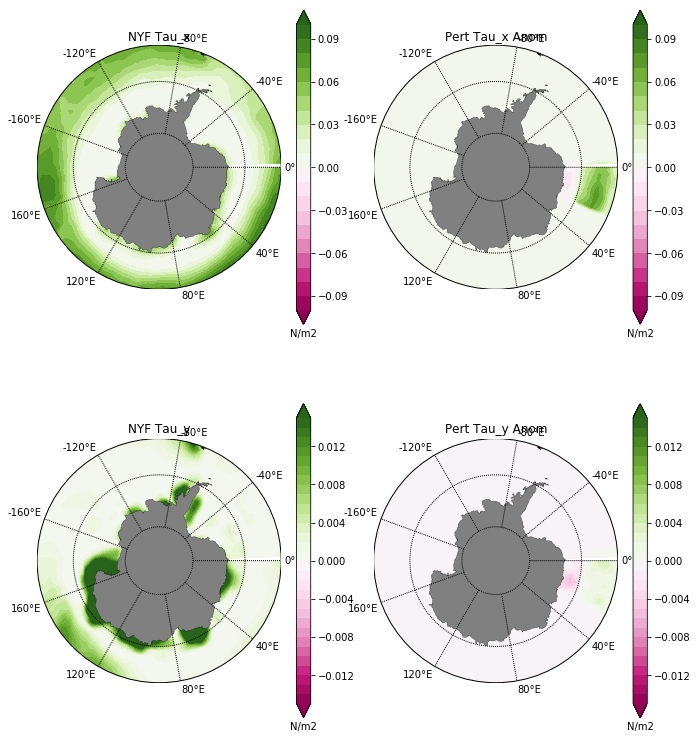

In [45]:
#plot nyf stresses
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#clev = np.arange(-.2,.21,.01)
clev = np.arange(-.1,.11,.01)
print clev

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,nyf_tx[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('NYF Tau_x')

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,pert_tx[0]-nyf_tx[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Pert Tau_x Anom')

clev = np.arange(-.015,.016,.001)

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,nyf_ty[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('NYF Tau_y')

plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,pert_ty[0]-nyf_ty[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Pert Tau_y Anom')

plt.tight_layout()
#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(CntrlDir,'tau_x.png')
#plt.savefig(of,dpi=220)



In [41]:
#compare with JRA
# Extract the variablesd
u_file ='/g/data1/v45/pas561/mom/archive/jra/v_10.2017.18Oct2017.ncra.nc'

nc = Dataset(u_file, mode='r') # file handle, open in read only mode
latitude = nc.variables['latitude'][:]
longitude = nc.variables['longitude'][:]
nc.close() # close the file

#fh=fcor/ht
print latitude.shape
print longitude.shape
#print longitude
#print latitude

CntrlDir = '/g/data1/v45/pas561/mom/archive/jra/'

Ocean_File = os.path.join(CntrlDir,'*ncra.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.uas_10m.shape
jra_u10=ff.uas_10m.load()
jra_v10=ff.vas_10m.load()

print jra_u10.shape
t1=0
t2=60
ltm_u10=np.mean(jra_u10[t1:t2,:,:],axis=0)
ltm_v10=np.mean(jra_v10[t1:t2,:,:],axis=0)

print ltm_u10.shape


(320,)
(640,)
/g/data1/v45/pas561/mom/archive/jra/*ncra.nc
(60, 320, 640)
(60, 320, 640)
(320, 640)


In [42]:
jm=latitude.shape[0]
im=longitude.shape[0]
print 'jm,im',jm,im
print 'shape area_t=\n ',jm, im

geolon2=np.zeros((jm,im))
geolat2=np.zeros((jm,im))

for j in range(jm):
    geolon2[j,:]=longitude

for i in range(im):
    geolat2[:,i]=latitude[:]

print geolat2.shape
print geolon2.shape

#print geolat
#print geolon


jm,im 320 640
shape area_t=
  320 640
(320, 640)
(320, 640)


In [44]:
#convert JRA speeds to stress
rho_air=1.22 #kg/m3
Cd=0.0012 #https://marine.rutgers.edu/dmcs/ms501/2004/Notes/Wilkin20041014.htm
jra_tx=rho_air*Cd*jra_u10*jra_u10
jra_ty=rho_air*Cd*jra_v10*jra_v10
ltm_tx=rho_air*Cd*ltm_u10*ltm_u10
ltm_ty=rho_air*Cd*ltm_v10*ltm_v10
print jra_tx.shape, ltm_tx.shape,ltm_ty.shape

(60, 320, 640) (320, 640) (320, 640)


[-10.    -9.75  -9.5   -9.25  -9.    -8.75  -8.5   -8.25  -8.    -7.75
  -7.5   -7.25  -7.    -6.75  -6.5   -6.25  -6.    -5.75  -5.5   -5.25  -5.
  -4.75  -4.5   -4.25  -4.    -3.75  -3.5   -3.25  -3.    -2.75  -2.5
  -2.25  -2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25   0.     0.25
   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25   2.5    2.75   3.
   3.25   3.5    3.75   4.     4.25   4.5    4.75   5.     5.25   5.5
   5.75   6.     6.25   6.5    6.75   7.     7.25   7.5    7.75   8.     8.25
   8.5    8.75   9.     9.25   9.5    9.75  10.  ]
[ -1.00000000e-01  -9.00000000e-02  -8.00000000e-02  -7.00000000e-02
  -6.00000000e-02  -5.00000000e-02  -4.00000000e-02  -3.00000000e-02
  -2.00000000e-02  -1.00000000e-02  -5.55111512e-17   1.00000000e-02
   2.00000000e-02   3.00000000e-02   4.00000000e-02   5.00000000e-02
   6.00000000e-02   7.00000000e-02   8.00000000e-02   9.00000000e-02
   1.00000000e-01]


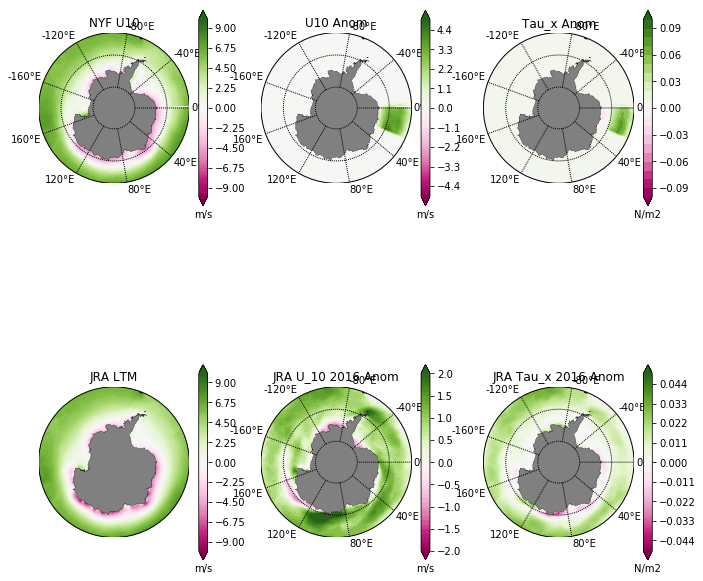

In [55]:
#plot wind speed, tx, 
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-10,10.25,.25)
print clev

plt.subplot(2,3,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,nyf_u_10[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.4)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('NYF U10')

clev = np.arange(-5,5.1,.1)

plt.subplot(2,3,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,pert_u_10[0]-nyf_u_10[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.4)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('U10 Anom')

clev = np.arange(-.1,.11,.01)
#clev = np.arange(-.1,.11,.01)
print clev

plt.subplot(2,3,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,pert_tx[0]-nyf_tx[0], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.4)
cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Tau_x Anom')

clev = np.arange(-10,10.25,.25)
i_yr=58 #2016
i_yr=50 #2008 

plt.subplot(2,3,4)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon2,geolat2) 
p1=map.contourf(X,Y,ltm_u10, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.4)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('JRA LTM')

clev = np.arange(-2,2.1,.1)

plt.subplot(2,3,5)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon2,geolat2) 
#p1=map.contourf(X,Y,np.mean(jra_u10[57:58,:,:],axis=0)-ltm_u10, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p1=map.contourf(X,Y,jra_u10[i_yr,:,:]-ltm_u10, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.4)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('JRA U_10 2016 Anom')

clev = np.arange(-.05,.051,.001)

plt.subplot(2,3,6)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon2,geolat2) 
p1=map.contourf(X,Y,jra_tx[i_yr,:,:]-ltm_tx, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.4)
cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('JRA Tau_x 2016 Anom')

plt.tight_layout()


[ -2.00000000e-01  -1.90000000e-01  -1.80000000e-01  -1.70000000e-01
  -1.60000000e-01  -1.50000000e-01  -1.40000000e-01  -1.30000000e-01
  -1.20000000e-01  -1.10000000e-01  -1.00000000e-01  -9.00000000e-02
  -8.00000000e-02  -7.00000000e-02  -6.00000000e-02  -5.00000000e-02
  -4.00000000e-02  -3.00000000e-02  -2.00000000e-02  -1.00000000e-02
   1.66533454e-16   1.00000000e-02   2.00000000e-02   3.00000000e-02
   4.00000000e-02   5.00000000e-02   6.00000000e-02   7.00000000e-02
   8.00000000e-02   9.00000000e-02   1.00000000e-01   1.10000000e-01
   1.20000000e-01   1.30000000e-01   1.40000000e-01   1.50000000e-01
   1.60000000e-01   1.70000000e-01   1.80000000e-01   1.90000000e-01
   2.00000000e-01]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


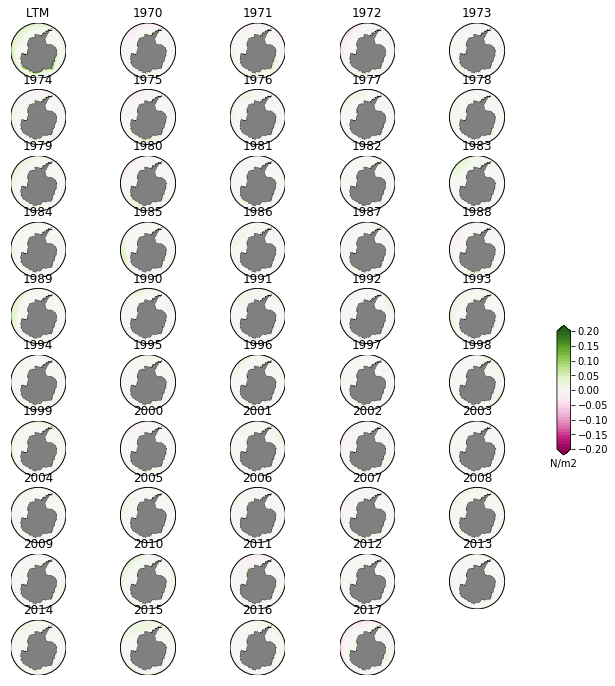

[ -1.00000000e-01  -9.00000000e-02  -8.00000000e-02  -7.00000000e-02
  -6.00000000e-02  -5.00000000e-02  -4.00000000e-02  -3.00000000e-02
  -2.00000000e-02  -1.00000000e-02  -5.55111512e-17   1.00000000e-02
   2.00000000e-02   3.00000000e-02   4.00000000e-02   5.00000000e-02
   6.00000000e-02   7.00000000e-02   8.00000000e-02   9.00000000e-02]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


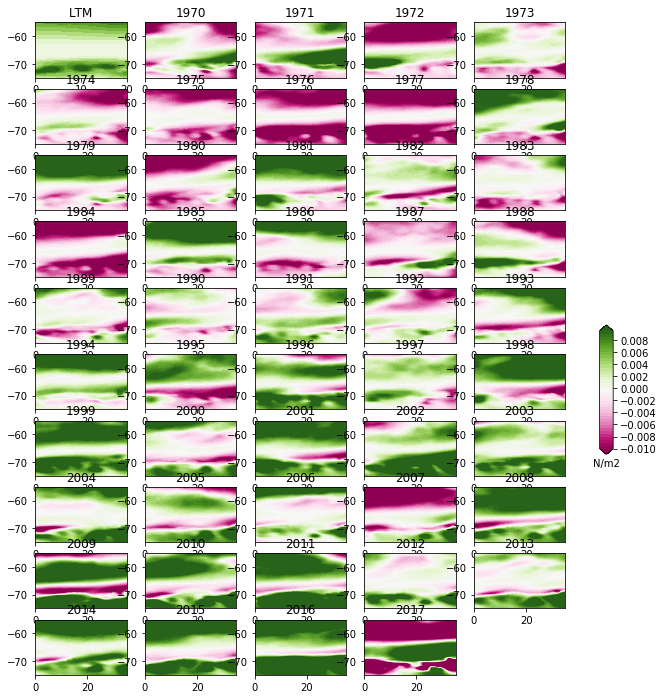

In [55]:
#focus on Weddell Region
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.1,.1,.01)
print clev

plt.subplot(10,5,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(longitude,latitude,ltm_tx,cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m^2')
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-55))
#plt.xlabel('Longitude ($^\circ$)')
#plt.ylabel('Latitude ($^\circ$)')
plt.xlim([0,20])
plt.title('LTM')

#clev = np.arange(-.1,.1,.01)
#clev = np.arange(-2,2.2,.2)

clev = np.arange(-.01,.01,.0005)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(10,5,yr+2)
    p1=plt.contourf(longitude,latitude,tau_x[yr+i_yr]-ltm_tx,cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('N/m^2')
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-75,-55))
    #plt.xlabel('Longitude ($^\circ$)')
    #plt.ylabel('Latitude ($^\circ$)')
    plt.xlim([0,35])
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m2')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
#plt.savefig(of)
of = os.path.join(CntrlDir,'Weddell_tau_x.png')
plt.savefig(of,dpi=220)

In [41]:
print fcor.shape
#print fcor[:,200]

(320, 640)


In [43]:
#plot wind stress curl ... Ekman pumping anomalies.
#(d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0

#drhodx=np.gradient(rho[0,:,:,:],dxt,axis=2)
#print drhodx.shape
tm=60
jra_Txf=np.zeros((tm,jm,im))
jra_Tyf=np.zeros((tm,jm,im))
jra_dTyfdx=np.zeros((tm,jm,im))
jra_dTxfdy=np.zeros((tm,jm,im))
jra_we=np.zeros((tm,jm,im))

for t in range(60):

    #print tau_x.shape
    jra_Txf[t,:,:]=tau_x[t,:,:]/fcor[:,:]
    jra_Tyf[t,:,:]=tau_y[t,:,:]/fcor[:,:]
    #print jra_Txf.shape

    jra_dTyfdx[t,:,:]=np.gradient(jra_Tyf[t,:,:],dxt,axis=1)
    #print jra_dTyfdx.shape
    jra_dTxfdy[t,:,:]=np.gradient(jra_Txf[t,:,:],dyt,axis=0)
    #print jra_dTxfdy.shape

    rho0=1035.0
    jra_we[t,:,:]=(jra_dTyfdx[t,:,:]-jra_dTxfdy[t,:,:])/rho0
    #print jra_we.shape



[ -1.00000000e-01  -8.00000000e-02  -6.00000000e-02  -4.00000000e-02
  -2.00000000e-02   1.38777878e-17   2.00000000e-02   4.00000000e-02
   6.00000000e-02   8.00000000e-02]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


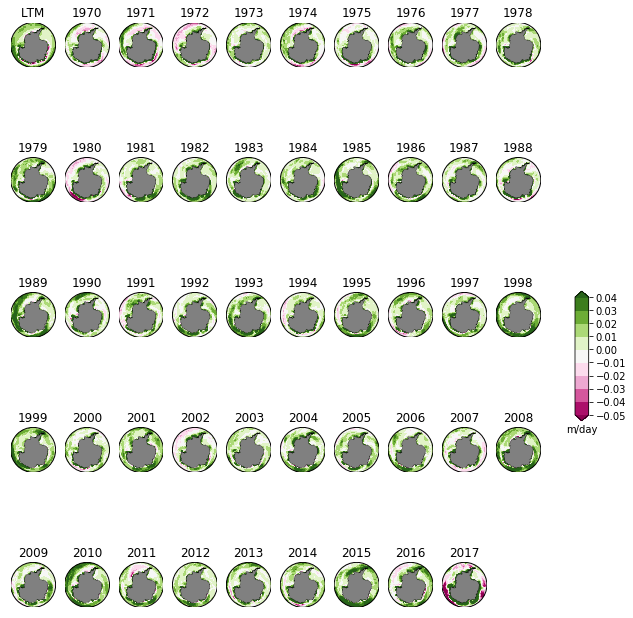

In [48]:
#convert m/s , m/day
jra_we_md=jra_we*60*60*24

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.1,.1,.02)
print clev

plt.subplot(5,10,1)
map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,np.mean(jra_we_md,axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('m/day')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('LTM')

#clev = np.arange(-.1,.1,.01)
#clev = np.arange(-2,2.2,.2)

clev = np.arange(-.05,.05,.01)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(5,10,yr+2)
    map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    #X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,jra_we_md[yr+i_yr]-np.mean(jra_we_md[0:60],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    #plt.title('Zonal Wind Stress Anomaly')
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m/day')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
##plt.savefig(of)
of = os.path.join(CntrlDir,'we_ekman1.png')
plt.savefig(of,dpi=220)


In [49]:
#plot wind stress curl ... Ekman pumping anomalies.
#(d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0

#drhodx=np.gradient(rho[0,:,:,:],dxt,axis=2)
#print drhodx.shape
tm=60
jra_Txf=tau_x/fcor
jra_Tyf=tau_y/fcor
print jra_Txf.shape

jra_dTyfdx=np.gradient(jra_Tyf,dxt,axis=2)
print jra_dTyfdx.shape
jra_dTxfdy=np.gradient(jra_Txf,dyt,axis=1)
print jra_dTxfdy.shape

rho0=1035.0
jra_we=(jra_dTyfdx-jra_dTxfdy)/rho0
print jra_we.shape


(60, 320, 640)
(60, 320, 640)
(60, 320, 640)
(60, 320, 640)


[ -5.00000000e-02  -4.00000000e-02  -3.00000000e-02  -2.00000000e-02
  -1.00000000e-02   6.93889390e-18   1.00000000e-02   2.00000000e-02
   3.00000000e-02   4.00000000e-02]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


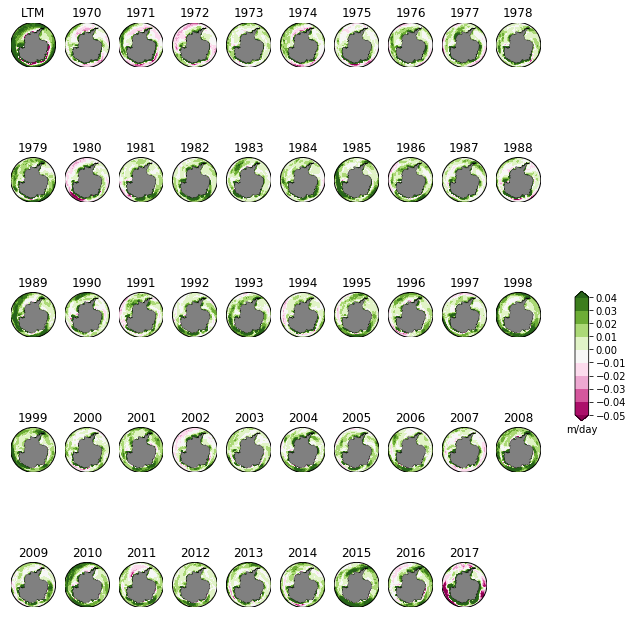

In [50]:
#convert m/s , m/day
jra_we_md=jra_we*60*60*24

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
print clev

plt.subplot(5,10,1)
map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,np.mean(jra_we_md[0:59],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('m/day')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('LTM')

#clev = np.arange(-.1,.1,.01)
#clev = np.arange(-2,2.2,.2)

clev = np.arange(-.05,.05,.01)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(5,10,yr+2)
    map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    #X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,jra_we_md[yr+i_yr]-np.mean(jra_we_md[0:60],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    #plt.title('Zonal Wind Stress Anomaly')
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m/day')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
##plt.savefig(of)
of = os.path.join(CntrlDir,'we_ekman2.png')
plt.savefig(of,dpi=220)


In [51]:

import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/jra/jra.ekman.all.m_day.nc', 'a')

var = ofile.variables['uas_10m']
print var.shape
print jra_we_md.shape
var[:] = jra_we_md

ofile.sync()
ofile.close()

(61, 320, 640)
(60, 320, 640)


In [53]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/jra/jra.ekman.all.ltm_anom.m_day.nc', 'a')

var = ofile.variables['uas_10m']
print var.shape
print jra_we_md.shape

var[:] = jra_we_md-np.mean(jra_we_md[0:60,:,:],axis=0)

ofile.sync()
ofile.close()

(61, 320, 640)
(60, 320, 640)
